In [230]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import control.matlab as matlab

Sistema massa-mola:
M x'' = u - k x - f'' x' 

In [231]:
# Massa mola 
f = 0.1
k = 5
M = 10

# Função de transferência
b0 = 1/M
a1 = f/M
a0 = k/M

In [232]:
# Definição das funções de transferência do sistema
s = matlab.tf('s')

# estimar z 
ftx = s**2 + a1 * s + a0
# estimar phi
ftx1 = 1 

# normalização
lb = s**2 + 2*s + 1
ftx = ftx/lb
ftx1 = ftx1/lb

# ?
ftx = ftx * b0 / (s**2 + a1 * s + a0)

ftx

TransferFunction(array([0.1  , 0.001, 0.05 ]), array([1.  , 2.01, 1.52, 1.01, 0.5 ]))

In [233]:
# Parâmetros de simulação
N = 40
dt = 0.001  # Taxa de amostragem
T = np.arange(0, N + dt, dt)
u = 0.1*np.cos(np.pi*T/7) + 0.05*np.sin(np.pi*T/5) # entrada

len(T)

40001

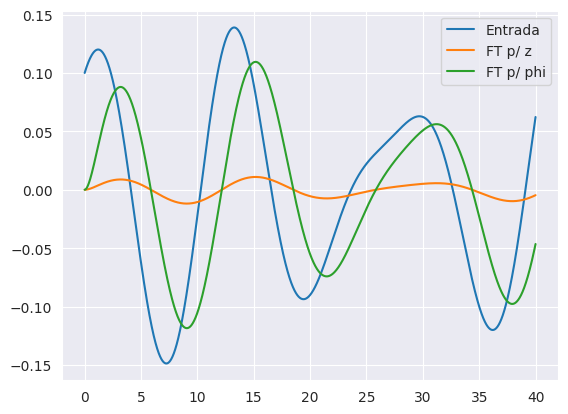

In [234]:
# Simulação dos modelos
z, T, _  = matlab.lsim(ftx, u, T)
phi, T, _ = matlab.lsim(ftx1, u, T)


# Plotagem dos resultados juntos
corte = 1*(len(T) - 1) # facilitar visualização
corte = int(np.ceil(corte))
plt.plot(T[:corte], u[:corte], label='Entrada')
plt.plot(T[:corte], z[:corte], label='FT p/ z')
plt.plot(T[:corte], phi[:corte], label='FT p/ phi')

plt.legend()
plt.show()

In [235]:
theta = np.zeros(int(N/dt) + 1)  # Matriz para armazenar os parâmetros estimados
erro = np.zeros(int(N/dt) + 1)  # Vetor de erros
gama = np.array([1])  # Matriz de ajuste

In [238]:
# Loop de iterações para o algoritmo adaptativo
for k in range(0, int(N/dt)):

    # Cálculo de ms (fator de ajuste)
    ms = 1 + 0.1 * np.dot(phi[k].T, phi[k])

    # Atualização dos parâmetros estimados usando o algoritmo adaptativo
    erro[k+1] = (z[k] - np.dot(theta[k], phi[k]))
    delta_theta = (dt * np.dot(gama, erro[k+1] * phi[k]) / ms)
    theta[k+1] = theta[k] + delta_theta


len theta: 40001


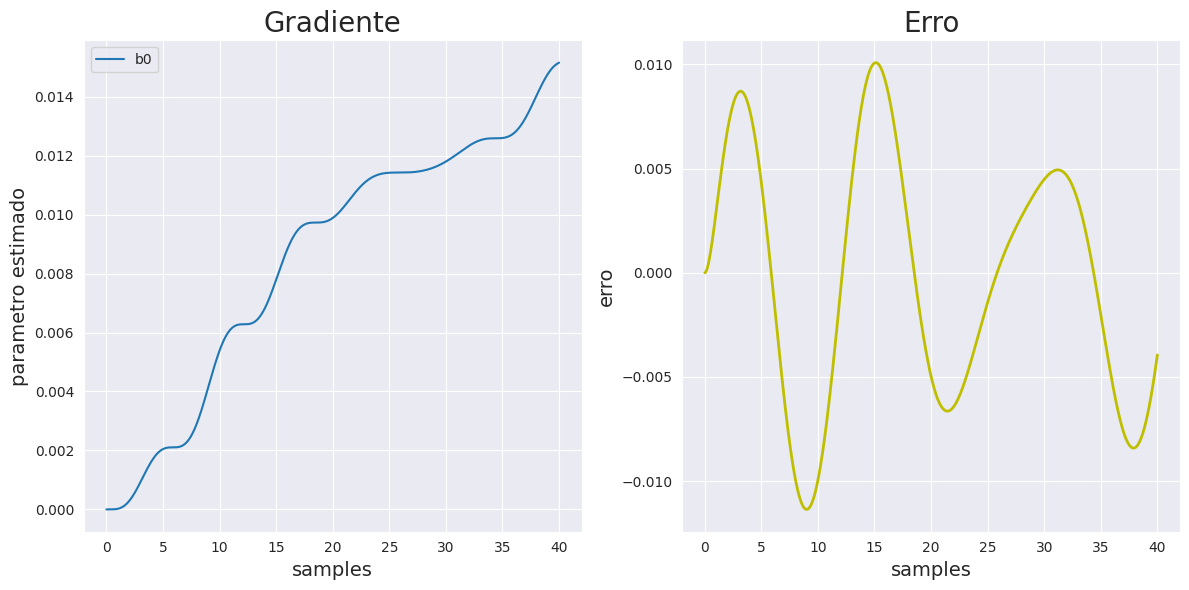

In [239]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%
# Gráfico dos parâmetros identificados e do erro

# Crie uma figura com 1 linha e 2 colunas para os subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

print(f'len theta: {len(theta)}')
corte = len(theta)

fontesize = 14
titlesize = 20
# Primeiro subplot (Gráfico dos parâmetros estimados)
axs[0].plot(T[:corte], theta[:corte], label='b0')
axs[0].legend()
axs[0].set_xlabel('samples', fontsize=fontesize)
axs[0].set_ylabel('parametro estimado', fontsize=fontesize)
axs[0].set_title('Gradiente', fontsize=titlesize)

# Segundo subplot (Gráfico do erro)
axs[1].plot(T[:corte], erro[:corte], 'y', linewidth=2)
axs[1].set_xlabel('samples', fontsize=fontesize)
axs[1].set_ylabel('erro', fontsize=fontesize)
axs[1].set_title('Erro', fontsize=titlesize)
axs[1].grid(True)

# Ajuste o espaço entre os subplots
plt.tight_layout()

# Exiba os subplots lado a lado
plt.show()